<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/IrisFlowersClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering Iris Flowers Species using KMeans**

#**Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

#**Data Collection**

In [3]:
from sklearn.datasets import load_iris

# check
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

**array to dataframe**

In [4]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

# check
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**appending target column**

In [5]:
iris_df['target'] = iris.target

# check
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#**Data Pre-processing & Visualization**

In [6]:
# check shape
iris_df.shape

(150, 5)

In [7]:
# check information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


* seems no null values

In [8]:
# check balance state
iris_df['target'].value_counts()

,count
target,
0,50
1,50
2,50


* seems, it's in balanced state

In [9]:
# each feature
for col in iris_df:
    print(col)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
target


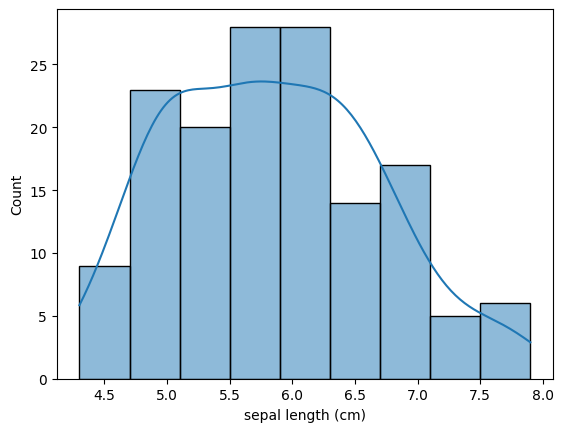

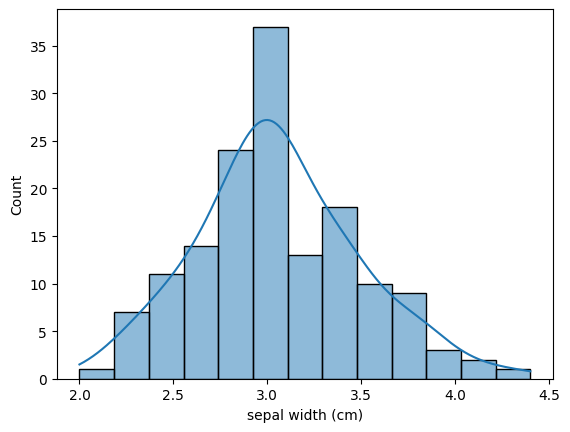

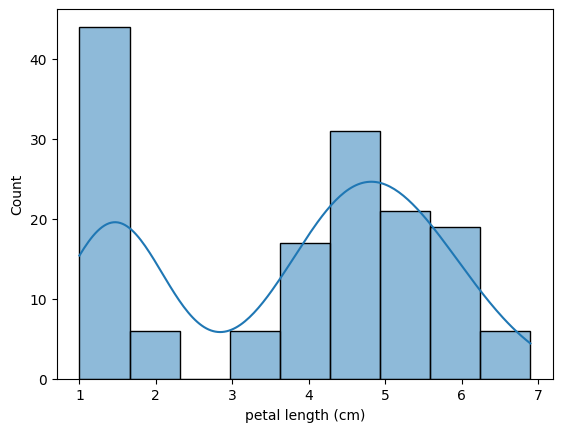

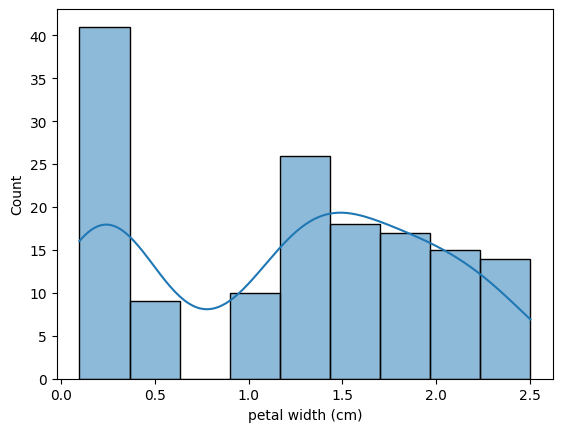

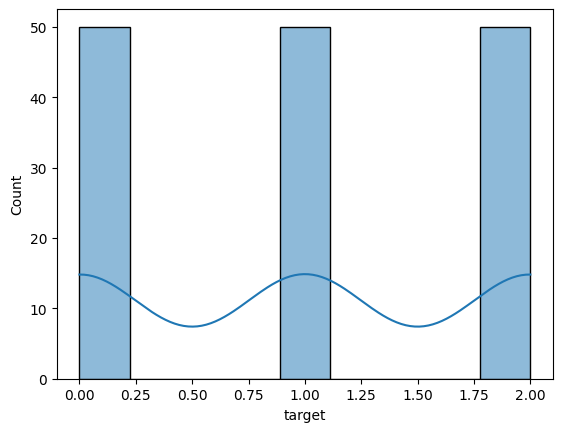

In [10]:
# visualization of distribution

for col in iris_df:
    sns.histplot(x=col,data=iris_df,kde=True)
    plt.show()

* seems, it's in normal distribution

In [11]:
# check stats

for col in iris_df:
    print(iris_df[col].describe())
    print()
    print('---------------------------------')

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

---------------------------------
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

---------------------------------
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

---------------------------------
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

---------------------------------
count    150.000000
mean       1.000000
std        0.819232
mi

* we may notice that all 4 species has equal mean and median and that's why normal distribution has occurred in data visualization

#**Model Building**

**Split features and label**

In [12]:
features = iris_df.drop('target',axis=1)
label = iris_df['target']

**Pointing Elbow Point Graph**

In [13]:

# wcss - within cluster sum of squares
wcss = []

# traverse by clusters
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(features.values,label)

    wcss.append(model.inertia_)


wcss

[681.3705999999996,
 152.34795176035797,
 78.85566582597727,
 57.350880212954756,
 46.47223015873018,
 39.066035353535376,
 34.305815295815314,
 30.476222943722966,
 29.906246659137977,
 28.545297810033116]

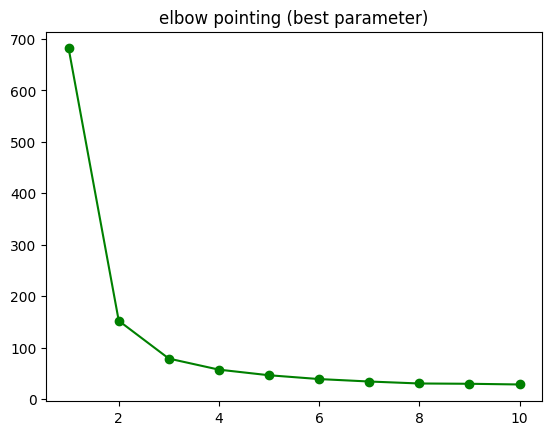

In [14]:
# visualization

plt.plot(range(1,11),wcss,'g-o')
plt.title('elbow pointing (best parameter)')
plt.show()

* seems, n_clusters = 3 , shows the best Elbow Point Graph here
* n_clusters = 3 could be a parameter for clustering

**Model Building**

In [15]:
# new instances of model
model = KMeans(n_clusters=3,init='k-means++',random_state=3)

y = model.fit_predict(features.values,label)

centers = model.cluster_centers_

# check
print(y)
print(centers)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


#**Clusters Visualization**

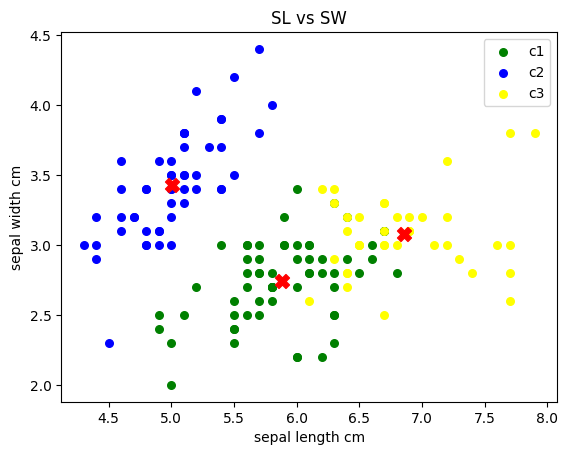

In [16]:
x = features.values

# bringing clusters based on sepal length and width only
plt.scatter(x[y==0,0],x[y==0,1],color='green',s=30,label='c1')
plt.scatter(x[y==1,0],x[y==1,1],color='blue',s=30,label='c2')
plt.scatter(x[y==2,0],x[y==2,1],color='yellow',s=30,label='c3')

# centroids
plt.scatter(centers[:,0],centers[:,1],marker='X',color='red',s=100)

# args
plt.title('SL vs SW')
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
plt.legend()
plt.show()

* seems, elbow point parameter works well , cluster seems good in differentiations.

* Thank you...